In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("../rapih_OmnibusLawSolusiRakyat.xlsx")

In [3]:
#Add @ on every username

df['user'] = '@' + df['user'].astype(str)
df['mentions_rapih'] = '@' + df['mentions_rapih'].astype(str)
df.head()

,user,mentions_rapih,time
0,@AdrianSanjaya16,@AdrianSanjaya16,2020-04-30 09:40:41
1,@AdrianSanjaya16,@AdrianSanjaya16,2020-04-30 09:41:18
2,@AdrianSanjaya16,@AdrianSanjaya16,2020-04-30 09:42:07
3,@ZahrilD,@ZahrilD,2020-04-30 09:42:49
4,@AdrianSanjaya16,@AdrianSanjaya16,2020-04-30 09:42:58


In [4]:
#Get unique count of user and mentions_rapih

user = list(df.user.unique())
mentions_rapih = list(df.mentions_rapih.unique())

In [5]:
G = nx.from_pandas_edgelist(df=df, source='user', target='mentions_rapih')
layout = nx.spring_layout(G, iterations=50)

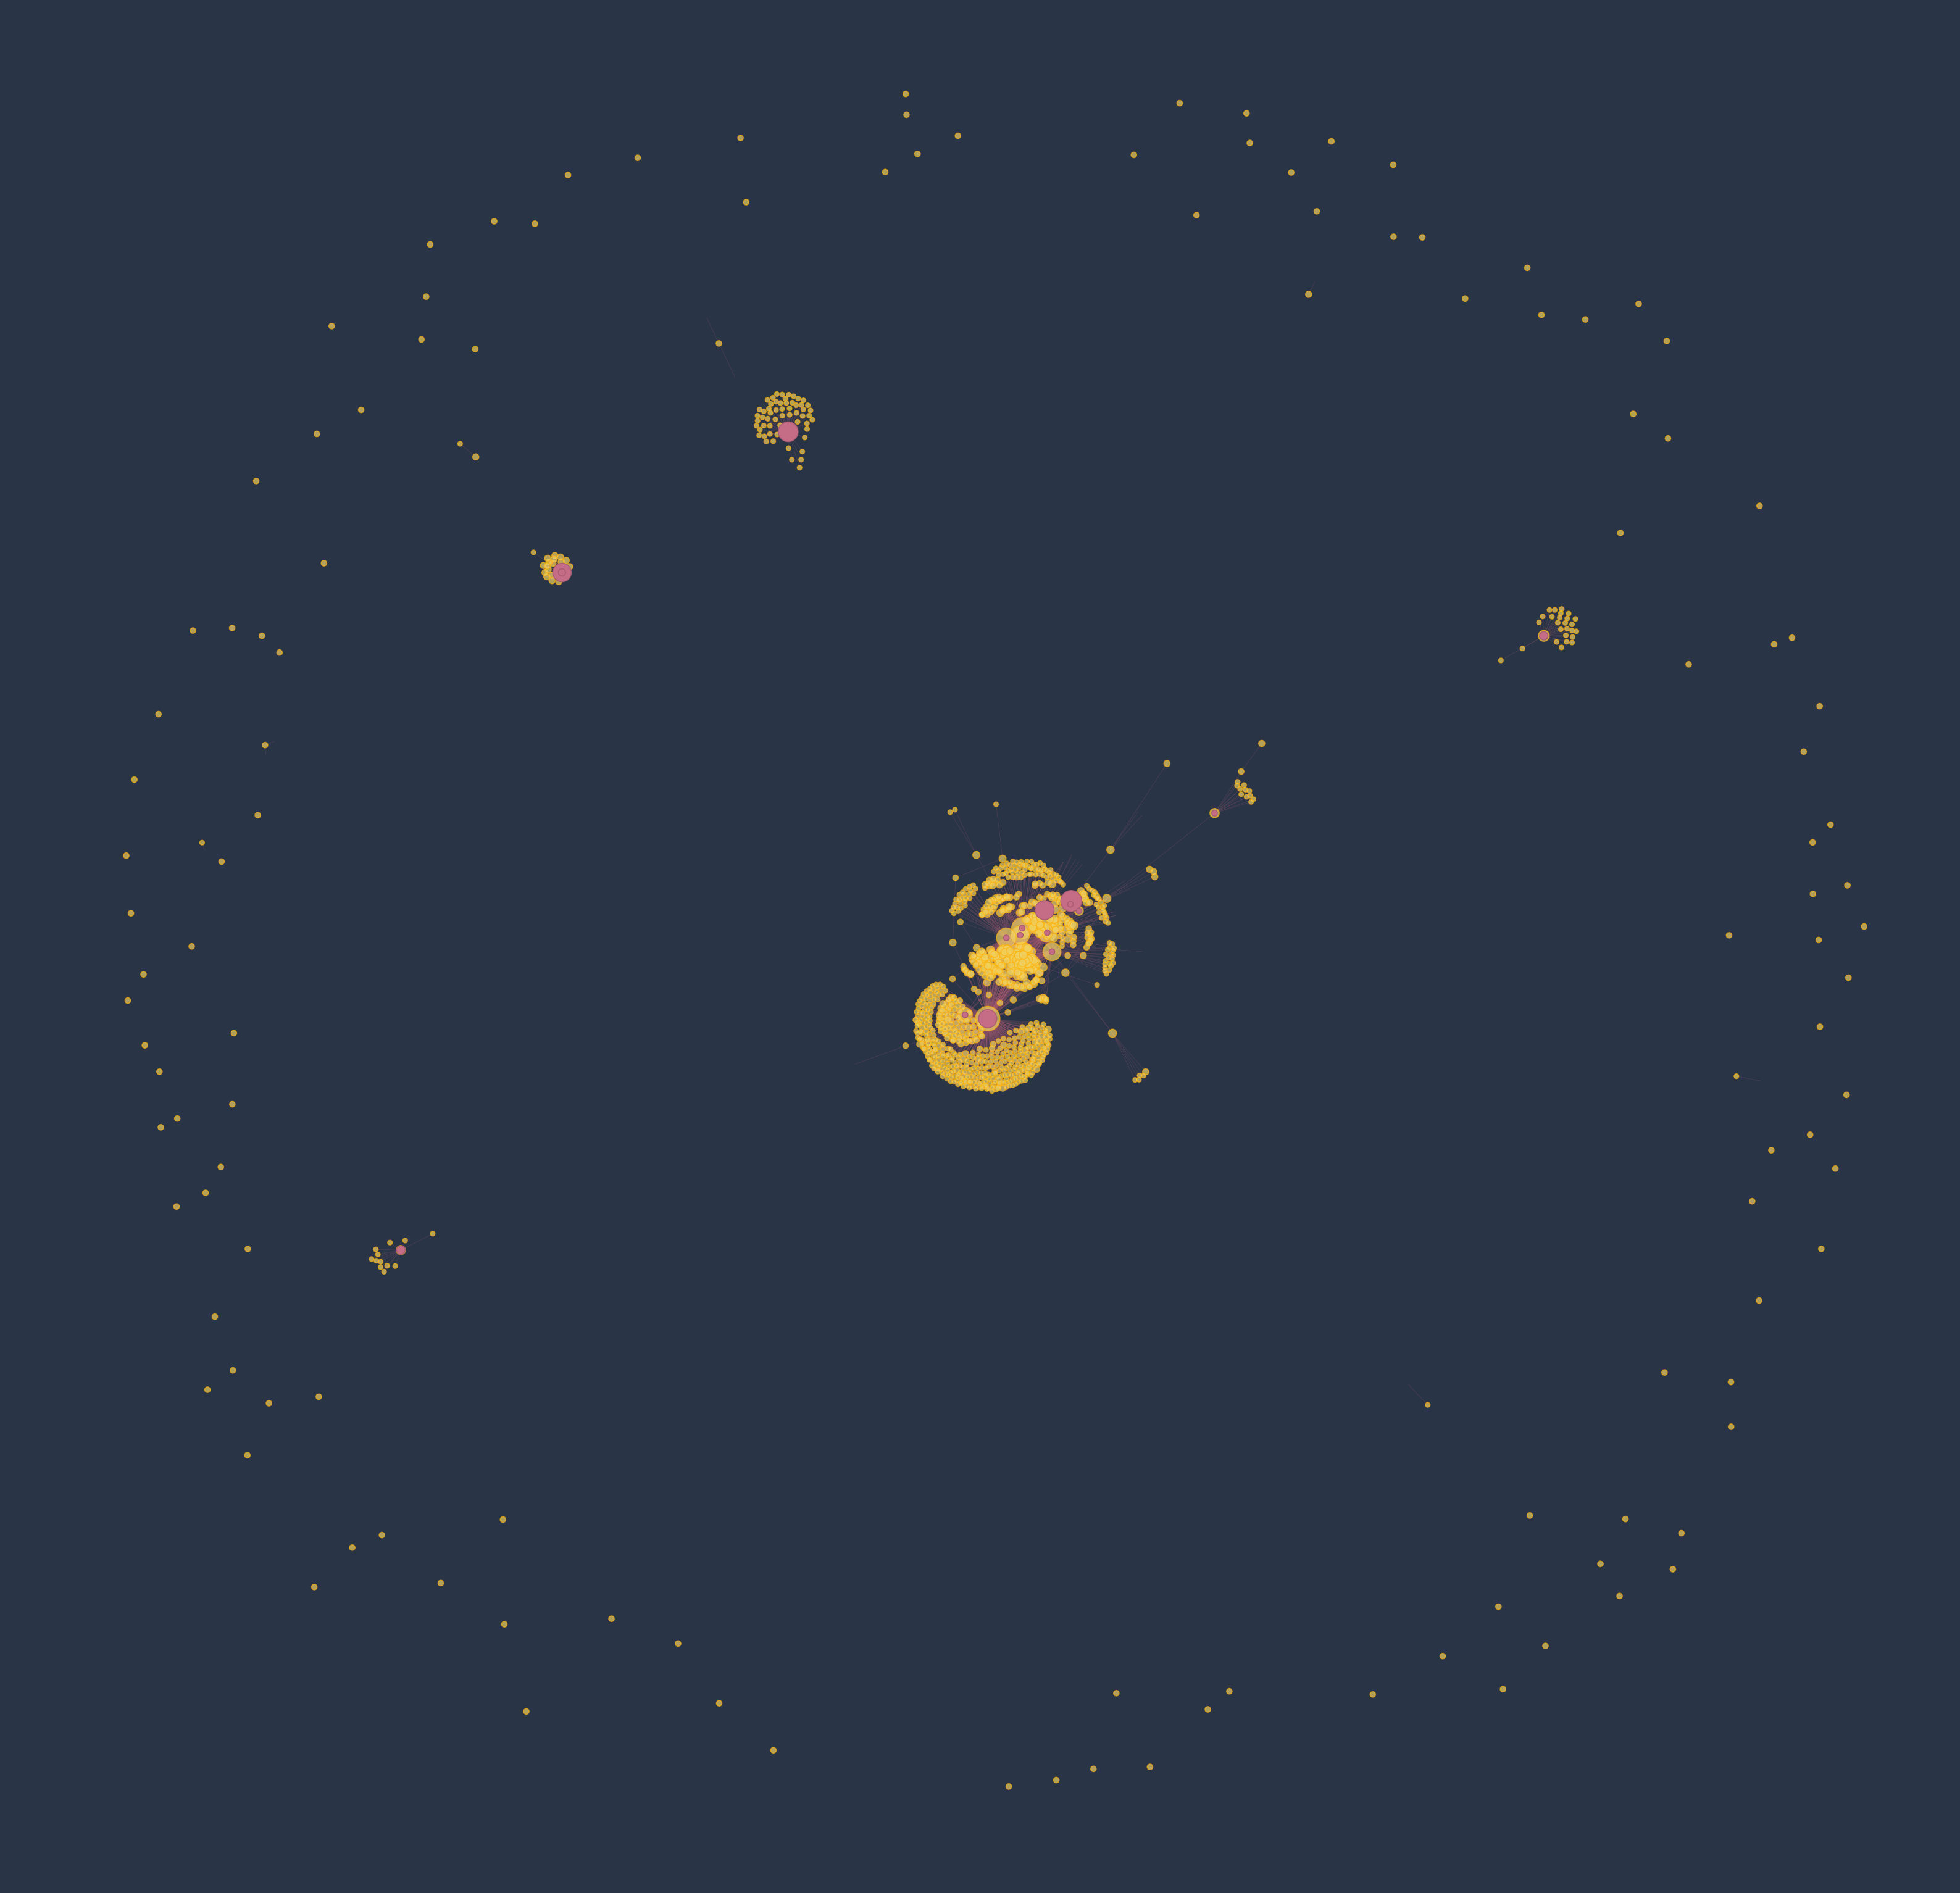

In [6]:
#make SNA graph
fig, ax = plt.subplots(figsize=(40, 40), dpi=100)

user_size = [np.sqrt(G.degree(user) * 1000) for user in user]
mentions_rapih_size = [np.sqrt(G.degree(mentions_rapih) * 1000) for mentions_rapih in mentions_rapih]

nx.draw_networkx_nodes(G, layout, nodelist=user, node_size=user_size, node_color='#F0D162', edgecolors='#ffb20a',alpha=0.7)
popular_people = [mentions_rapih for mentions_rapih in mentions_rapih if G.degree(mentions_rapih) > 10]
nx.draw_networkx_nodes(G, layout, nodelist=popular_people, node_color='#C56C86', node_size=mentions_rapih_size, edgecolors='#a85b71')
nx.draw_networkx_edges(G, layout, width=0.5, edge_color="#a85b71", alpha=0.3)

#node_labels_edge = dict(zip(mentions_rapih, mentions_rapih))
#nx.draw_networkx_labels(G, layout, labels=node_labels_edge, font_size=8, font_color='#FFFFFF')

plt.axis('off')

fig.set_facecolor('#293447')